In [36]:
# Import Libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import numpy as np

In [37]:
#Read the data
bikes = pd.read_csv('hour.csv')

In [38]:
# Prelim Analysis and Feature selection
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered','month'], axis=1)

bikes_prep.isnull().sum()


season        0
year          0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

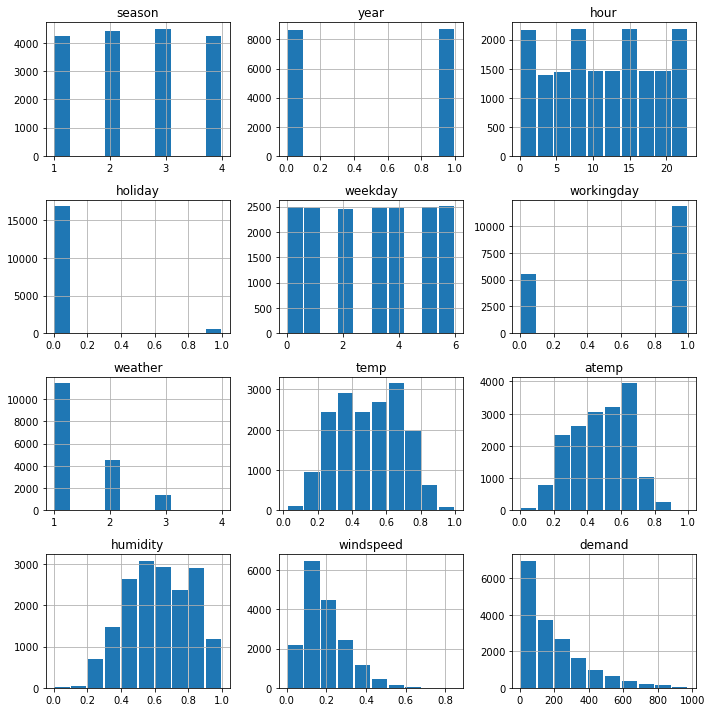

In [39]:
# Create pandas histogram
bikes_prep.hist(rwidth = 0.9,figsize=(10,10))
plt.tight_layout()

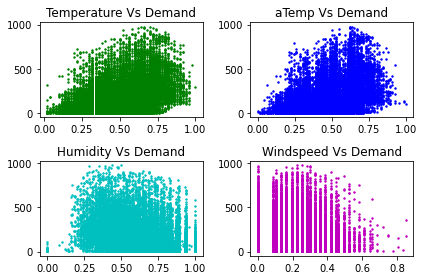

In [40]:
# Data Visualisation
# Visualise the continuous features Vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='c')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='m')

plt.tight_layout()

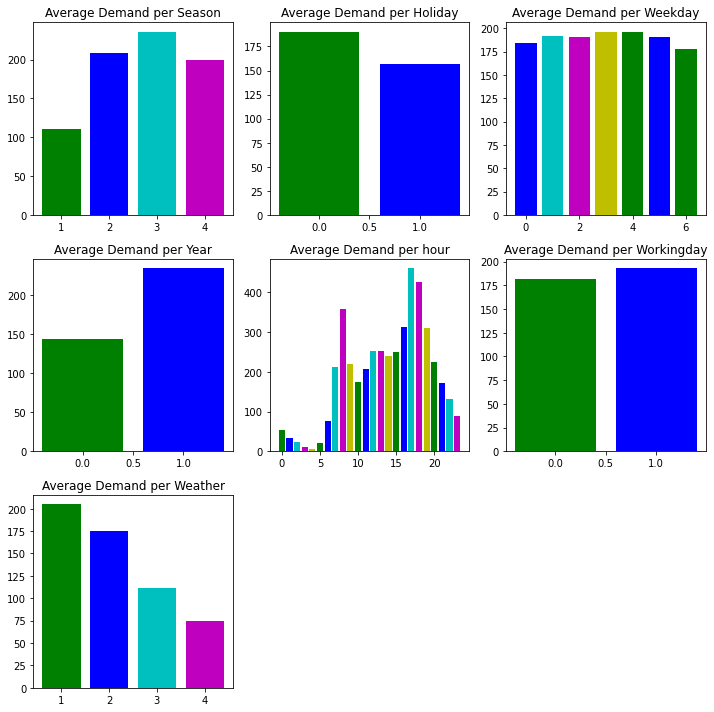

In [41]:
# Visualise the categorical features
colors = ['g', 'b', 'c', 'm','y']
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


plt.subplot(3,3,2)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()


In [42]:
# Check for outliers

bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [43]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [44]:
# Check Multiple Linear Regression Assumptions

# Linearity using correlation coefficient matrix using corr
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [45]:
# Drop irrelevant features
bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

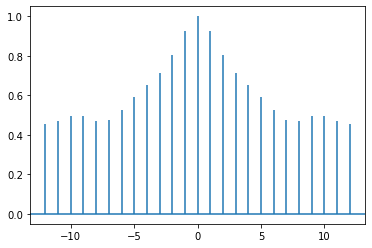

In [46]:
#Autocorrelation of demand using acor
dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)
plt.show()


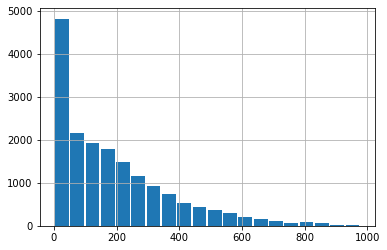

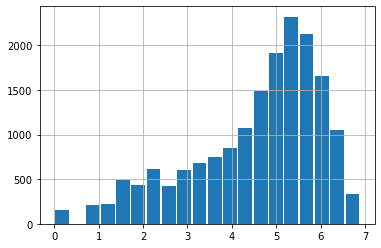

In [47]:
#Create/Modify new features

# Log Normalise the feature 'Demand'
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])


In [48]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag

,season,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [49]:
# Create Dummy Variables and drop first to avoid dummy variables trap
bikes_prep_lag.dtypes


season        int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [50]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

In [51]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [52]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,hour_1,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
# Create Train and test split
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


In [54]:
# Fit and Score the model
# Linear Regression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

train_score = std_reg.score(X_train, Y_train)
test_score  = std_reg.score(X_test, Y_test)
print(train_score,test_score)

# Create Y Predictions
Y_predict = std_reg.predict(X_test)
print(Y_predict)





0.9191306085955647 0.9300577412575219
[[3.17876968]
 [2.83616518]
 [3.18724288]
 ...
 [4.35643349]
 [4.27921436]
 [3.72427642]]


In [55]:
intercept=std_reg.intercept_
coeficient=std_reg.coef_
print(intercept,coeficient)

[0.76614584] [[ 6.39468081e-01 -3.91152127e-02  8.61273106e-01  5.77188162e-03
  -2.26773719e-01  9.84517837e-02  5.48439655e-04  9.91172184e-02
  -1.74537171e-01 -2.49808309e-01 -5.16542543e-01 -5.14565924e-01
   8.04952471e-01  9.71797869e-01  8.03739180e-01  8.57001718e-01
   2.49499718e-01  3.90070190e-01  9.40204391e-01  9.48623726e-01
   6.92910549e-01  6.45281338e-01  8.07068313e-01  1.00814321e+00
   1.17180356e+00  7.63980128e-01  5.98418635e-01  6.39697442e-01
   6.43394472e-01  5.51018017e-01  2.68641058e-01 -7.28329578e-02
  -3.66719841e-02 -2.60673529e-01  3.46241554e-02]]


In [56]:
#calculating rmse
mse=mean_squared_error(Y_test,Y_predict)
rmse=math.sqrt(mse)
rmse

0.3773831165488198

In [57]:
#calculating rmsle
Y_test_e=[]
Y_predict_e=[]
for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
lse=0
for i in range(0,len(Y_test_e)):
    y_t=math.log(Y_test_e[i]+1)
    y_p=math.log(Y_predict_e[i]+1)
    y_k=(y_t-y_p)**2
    lse=lse+y_k
rmlse=math.sqrt(lse/len(Y_test_e))
    
print(rmlse)


0.35234986095413845
